<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-data-analysis-with-Pandas" data-toc-modified-id="Exploratory-data-analysis-with-Pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory data analysis with Pandas</a></span></li><li><span><a href="#Table-Connections" data-toc-modified-id="Table-Connections-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Table Connections</a></span><ul class="toc-item"><li><span><a href="#Join" data-toc-modified-id="Join-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Join</a></span></li><li><span><a href="#Concatenation" data-toc-modified-id="Concatenation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Concatenation</a></span></li><li><span><a href="#Example-on-YouTube-clips" data-toc-modified-id="Example-on-YouTube-clips-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Example on YouTube clips</a></span></li></ul></li><li><span><a href="#Types-of-variables" data-toc-modified-id="Types-of-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Types of variables</a></span></li><li><span><a href="#Working-with-categorical-variables" data-toc-modified-id="Working-with-categorical-variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Working with categorical variables</a></span><ul class="toc-item"><li><span><a href="#When-there-are-two-categories:" data-toc-modified-id="When-there-are-two-categories:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>When there are two categories:</a></span></li><li><span><a href="#When-there-are-more-than-two-categories" data-toc-modified-id="When-there-are-more-than-two-categories-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>When there are more than two categories</a></span></li></ul></li><li><span><a href="#Working-with-date-and-time" data-toc-modified-id="Working-with-date-and-time-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Working with date and time</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Missing values</a></span><ul class="toc-item"><li><span><a href="#Identification" data-toc-modified-id="Identification-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Identification</a></span></li><li><span><a href="#Delete" data-toc-modified-id="Delete-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Delete</a></span></li><li><span><a href="#Filling-in" data-toc-modified-id="Filling-in-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Filling in</a></span></li></ul></li><li><span><a href="#Anomaly-detection" data-toc-modified-id="Anomaly-detection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Anomaly detection</a></span><ul class="toc-item"><li><span><a href="#We-estimate-the-average-height-of-people-in-a-school-classroom:" data-toc-modified-id="We-estimate-the-average-height-of-people-in-a-school-classroom:-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>We estimate the average height of people in a school classroom:</a></span></li><li><span><a href="#Detection-and-removal-of-outliers-on-the-example-of-clips:" data-toc-modified-id="Detection-and-removal-of-outliers-on-the-example-of-clips:-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Detection and removal of outliers on the example of clips:</a></span></li></ul></li></ul></div>

## Exploratory data analysis with Pandas

Plan:
* Table connections
* Types of variables
* Working with categorical variables
* Working with date and time
* Missing values
* Anomaly detection

We also get acquainted with visualization along the way, but more about this in the next time

In [1]:
import numpy as np # library for matrices and mathematics
import pandas as pd # library for working with tables
from scipy import stats # module for working with statistics

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') # graph style
%matplotlib inline

## Table Connections

It is often quite inconvenient to store information in one table. When you have a very large IT company, there is so much data that if you add them to one table, working with it will be very inefficient in time and memory. Therefore, information is put in a bunch of different tables, and special *relationships* are built over them - the so-called columns by which these tables can be combined. 

An example of a device of such a data storage structure:

<center>
<img src="http://progi.pro/media/main/82/d3/34/82d334f5b4b49d424a2460e796a30cd5.png" height="200" width="600">
</center>

### Join

<center>
<img src="https://community.qlik.com/legacyfs/online/87693_all-joins.png" height="400" width="400">
</center>

In [2]:
df1 = pd.DataFrame({'Student': ['Tom', 'Ujin', 'Ann', 'Polina','Sam'],
                    'group': ['01', '02', '02', '01','02']})
df2 = pd.DataFrame({'Name': ['Tom', 'Ujin', 'Ann', 'Polina', 'Kit'],
                    'GPA': ['7.8', '6.4', '8.3', '9', '10']})
display(df1, df2)

,Student,group
0,Tom,01
1,Ujin,02
2,Ann,02
3,Polina,01
4,Sam,02


,Name,GPA
0,Tom,7.8
1,Ujin,6.4
2,Ann,8.3
3,Polina,9
4,Kit,10


In [3]:
# right join
pd.merge(df1, df2, left_on='Student', right_on='Name', how='right')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9
4,NaN,NaN,Kit,10


In [4]:
# outer join
pd.merge(df1, df2, left_on='Student', right_on='Name', how='outer')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9
4,Sam,02,NaN,NaN
5,NaN,NaN,Kit,10


In [5]:
# left join - we leave everything in the left table
pd.merge(df1, df2, left_on='Student', right_on='Name', how='left')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9
4,Sam,02,NaN,NaN


In [6]:
# inner join by default
pd.merge(df1, df2, left_on='Student', right_on='Name')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9


### Concatenation

In [7]:
df1 = pd.DataFrame({'name': ['Max', 'Phil', 'Vlad', 'Nastya'], 'students': [20, 21, 30, 42]})
df2 = pd.DataFrame({'name': ['Ahmed', 'Andrey'], 'students': [50, 40]})

display(df1, df2)

,name,students
0,Max,20
1,Phil,21
2,Vlad,30
3,Nastya,42


,name,students
0,Ahmed,50
1,Andrey,40


In [8]:
pd.concat([df1, df2]).reset_index(drop=True)

,name,students
0,Max,20
1,Phil,21
2,Vlad,30
3,Nastya,42
4,Ahmed,50
5,Andrey,40


### Example on YouTube clips

In the future we will work with a database containing information about YouTube clips. There are several tables in the database, between which connections are built. The structure looks like this:

<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem09_pandas/images/struct.png?raw=true" height="500" width="500">
</center>

__Column Description:__

* 'id_title' $-$ unique id of the video title
* 'id_music_style' $-$ unique genre id
* 'id_performer' $-$ unique artist id
* 'title' $-$ video title
* 'comment Count' $-$ number of comments
* 'dislikecounts' $-$ number of dislikes
* 'like Count' $-$ number of likes
* 'music_style' $-$ music style
* 'performer' $-$ performer
* 'view Count' $-$ number of views
* 'commentators_uniq' $-$ the number of unique commentators
* 'comments_obscene_cnt' $-$ number of negative comments
* 'video_age' $-$ the age of the video in days (at the time of '2019-03-15')

In [9]:
# let's load all the tables
df_perf = pd.read_csv('data/performer_table.csv', sep=';')
df_title = pd.read_csv('data/title_table.csv', sep=';')
df_genre = pd.read_csv('data/music_style_table.csv', sep=';')

df_stat = pd.read_csv('data/title_stat_table.csv', sep=';')

##### Task #1:

Which performer gets the most hate? (hate is determined by the number of negative comments)

In [10]:
# # without merge
id_ = df_stat[df_stat['comments_obscene_cnt'] == df_stat['comments_obscene_cnt'].max()]['id_performer']
id_

17499    100020
Name: id_performer, dtype: int64

In [11]:
df_perf[df_perf['id_performer'] == 100020]['performer']

29    gazgolder
Name: performer, dtype: object

In [12]:
# with merge
merged_df = pd.merge(df_stat, df_perf, on='id_performer')
merged_df[merged_df['comments_obscene_cnt'] == merged_df['comments_obscene_cnt'].max()]['performer']

17499    gazgolder
Name: performer, dtype: object

##### Task #2:

For each genre, output the number of views of the most popular clip? Who is its performer? What is the name of the clip?

In [13]:
## Your code

## Types of variables

__classification of variables by data type:__  

* 'int' $-$ numeric, integers (1000, 0, -1)
* 'float' $-$ numeric, real numbers (1.0, 2.564523)
* 'object' $-$ string (butyrka, JPMorgan, f12aaz//)
* 'bool` $-$ Boolean (True, False)
* 'datetime' $-$ date (2020-01-12, 23.Jan.20)


__classification of variables by meaning:__  

* 'Continuous' $-$ contain a continuous set of values at some interval (s/n, height of a person, weight of a loaf of bread, etc.)
* 'Categorical' $-$ contain a finite small set of values (age of children, type of store)
* 'Binary' $-$ subtype of a categorical variable having only 2 categories (gender, capitals of two countries)

In [14]:
df = pd.read_csv('data/youtube_data_short.csv', sep='\t')

In [15]:
# we look at the types of variables
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

## Working with categorical variables

### When there are two categories:

We will select only clips of the genre `rock` and `rap`. Let's imagine that they are the only ones we are interested in.

In [16]:
df.music_style.value_counts()

rock       5888
estrada    4151
popsa      3339
shanson    2061
rap        2028
indi       1359
classic     298
Name: music_style, dtype: int64

In [17]:
genres_to_keep = ['rock', 'rap']

df_small = df[df.music_style.isin(genres_to_keep)]
df_small.head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
8,"""Hey Tovarish"" Video Shooting",10.0,1.0,34.0,rock,мумий_тролль,3815.0,9.0,0.0,2539
15,"""SOS Матросу!"" - тизер фильма",10.0,4.0,68.0,rock,мумий_тролль,7632.0,5.0,0.0,1739
36,"""ВОИН ДУМА""",4.0,0.0,49.0,rock,король_и_шут,1950.0,NaN,NaN,3819
38,"""Виктор Цой. 50 лет"" Кукрыниксы - Печаль, Конч...",2.0,4.0,65.0,rock,кукрыниксы,9986.0,2.0,0.0,2351
40,"""Всё, что было"". Начало.",23.0,5.0,171.0,rock,ария,11168.0,21.0,1.0,2351


In [18]:
df_small.music_style.value_counts()

rock    5888
rap     2028
Name: music_style, dtype: int64

In such a "sub-frame", our column 'music_style' has the type `object` (because it contains strings), and is also `binary`, since it contains only two values (`rock` and `rap`)

However, the problem with string variables is that many models do not know how to work with them. The computer is more used to operating with numbers. 

That is why simple manipulations are performed on string binary variables. Either encode them into numbers 1 / 0, or create a Boolean type True / False, which is to some extent the same thing. 

Let's try to convert our binary string variable music_style:

In [19]:
d = {'rock': 1, 'rap': 0}

df_small['is_rock'] = df_small['music_style'].map(d)

<ipython-input-19-21b19c4d8243>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['is_rock'] = df_small['music_style'].map(d)


In [20]:
df_small.head(2)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,is_rock
8,"""Hey Tovarish"" Video Shooting",10.0,1.0,34.0,rock,мумий_тролль,3815.0,9.0,0.0,2539,1
15,"""SOS Матросу!"" - тизер фильма",10.0,4.0,68.0,rock,мумий_тролль,7632.0,5.0,0.0,1739,1


##### Task #3: 
What is the proportion of observations of both genres?

In [21]:
## Your code

### When there are more than two categories

Let's go back to our full dataframe. In it, music_style takes not 2 values, but as many as 7. What should I do in this case?

**Naive method:** Let's match some number to each value from music_style. This method is called Label Encoding. Think in advance, what problems can such a method create?

In [22]:
df.music_style.unique()

array(['popsa', 'rock', 'classic', 'indi', 'estrada', 'shanson', 'rap'],
      dtype=object)

In [23]:
# creating a dictionary
d = dict(zip(df.music_style.unique(), np.arange(7)))
print(d)

# let's transform
df['music_style_int'] = df['music_style'].map(d)

{'popsa': 0, 'rock': 1, 'classic': 2, 'indi': 3, 'estrada': 4, 'shanson': 5, 'rap': 6}


However, the problem with this method is that we involuntarily set the **order** on our categories


To avoid this, another method is more often used: **One Hot Encoding**

<center>
<img src="https://4.bp.blogspot.com/-iC7OQxsaPY0/XMdB9Q9QahI/AAAAAAAAGoY/qEStugMphDIbUIabd_taWCzTyscXzxOPgCLcBGAs/s1600/human_transpose.JPG" height="200" width="600">
</center>   

In pandas, such a conversion can be done using the `get_dummies()` function

In [24]:
pd.get_dummies(df['music_style']).head()

,classic,estrada,indi,popsa,rap,rock,shanson
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


This method also has its own problems that go beyond the scope of our course. For example, it is a complete multicollinearity (or linear dependence) columns. More information about this can be found here: https://www.youtube.com/watch?v=k9PPuTmTLMk

## Working with date and time

Python has its own type of variables for date and time: datetime / timestamp. All useful methods that operate on dates can be found either in the pandas package or in the additional `datetime` package

In [25]:
# get the date from the string
pd.to_datetime('01/01/20')

Timestamp('2020-01-01 00:00:00')

In [26]:
# you can get today's date
from datetime import datetime

datetime.today()

datetime.datetime(2021, 11, 19, 4, 49, 29, 143321)

In [27]:
# what year is it today?
datetime.today().year

2021

In [28]:
# convert it to a string in a format that is convenient for us
datetime.today().strftime('%d/%B/%y %H %I')

'19/November/21 04 04'

In [29]:
from datetime import timedelta

# what month was 50 days ago?
(datetime.today() - timedelta(days=50)).month

9

In [30]:
datetime.today() - timedelta(days=50)

datetime.datetime(2021, 9, 30, 4, 49, 29, 193681)

##### Task #4: 

In our dataset there is a column `video_age`, which shows us the age of our clip in days from March 15, 2019. Based on it, get the publication date for each clip and save it to a new column.

In [31]:
## Your code

##### Task #5:

What is the distribution of the number of released clips by year?

In [32]:
## Your code

##### Task #6:

Output the month during which the most clips were published on YouTube

In [33]:
## Your code

## Missing values

Missing data $-$ is a nasty problem that you can encounter when working. Omissions occur almost always. The reasons for the omissions may be, for example, the technical capabilities of your parser, which could not get some of the information from the site, or, for example, if you are Yuri Dud and interview people about their earnings, collecting statistics for further research, it is unlikely that everyone will want to answer you.

### Identification

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          18914 non-null  float64
 2   dislikeCount          18850 non-null  float64
 3   likeCount             18850 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19123 non-null  float64
 7   commentators_uniq     12314 non-null  float64
 8   comments_obscene_cnt  12314 non-null  float64
 9   video_age             19124 non-null  int64  
 10  music_style_int       19124 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.6+ MB


In [35]:
df.isnull().sum()

title                      0
commentCount             210
dislikeCount             274
likeCount                274
music_style                0
performer                  0
viewCount                  1
commentators_uniq       6810
comments_obscene_cnt    6810
video_age                  0
music_style_int            0
dtype: int64

In [36]:
df.isnull().sum().sum()

14379

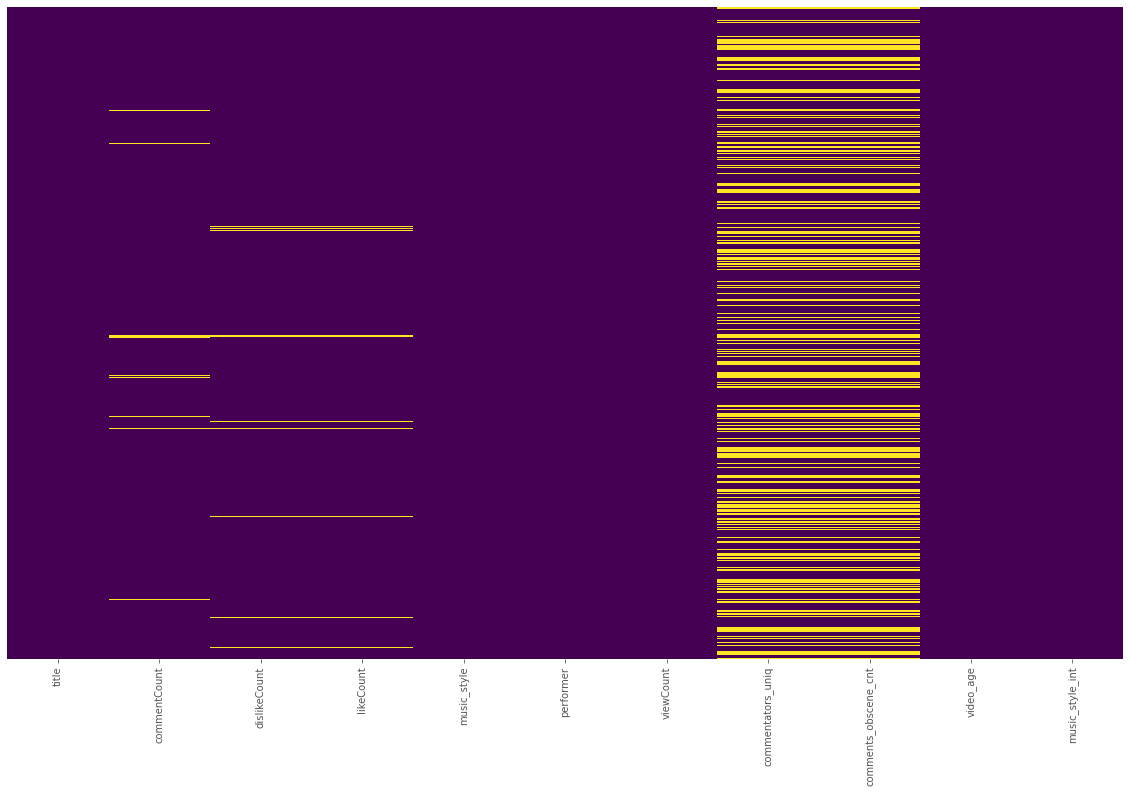

In [37]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Delete

In [38]:
print(df.shape)

# by default deletes lines where there is na
print(df.dropna().shape)

# we can delete columns where there is at least one omission
print(df.dropna(axis=1).shape)

(19124, 11)
(12116, 11)
(19124, 5)


In [39]:
print(df.shape)

(19124, 11)


In [40]:
# the result is the same for lines below
# df = df.dropna()
# df.dropna(inplace=True)

Deleting is often too expensive an operation, since we get rid of a bunch of data, which is often not enough anyway

### Filling in

In [41]:
# was
ser = pd.Series([24, np.nan, 27, 2])
ser

0    24.0
1     NaN
2    27.0
3     2.0
dtype: float64

In [42]:
# fill in with zero
ser.fillna(0)

0    24.0
1     0.0
2    27.0
3     2.0
dtype: float64

In [43]:
# fill in the previous value
ser.fillna(method='ffill').head()

0    24.0
1    24.0
2    27.0
3     2.0
dtype: float64

In [44]:
# fill in with the following value
ser.fillna(method='bfill').head()

0    24.0
1    27.0
2    27.0
3     2.0
dtype: float64

##### Task #7:

Fill in the gaps in the columns of the clip table with the average

In [45]:
# Your code

## Anomaly detection

Anomalies in the $-$ data are as common a problem as missing values, but more serious. Let's look at an example of how anomalies can ruin everything:  

### We estimate the average height of people in a school classroom:

Imagine that we want to estimate the average height of people in a school classroom. We have the following table:

In [46]:
students = pd.DataFrame({'student': ['Max', 'Ahmed', 'Nastya', 'Vlad'],
                        'height_cm': [170, 165, 171, 168]})

students

,student,height_cm
0,Max,170
1,Ahmed,165
2,Nastya,171
3,Vlad,168


Find the average:

In [47]:
students.height_cm.mean()

168.5

Now imagine that a brand new Philip came to our class, who stayed for the second year because he played basketball, and did not study. We have a new observation in the table, let's try to estimate the growth now.

In [48]:
students.loc[4] = ['Phil', 210]
students

,student,height_cm
0,Max,170
1,Ahmed,165
2,Nastya,171
3,Vlad,168
4,Phil,210


In [49]:
students.iloc[:, 0]

0       Max
1     Ahmed
2    Nastya
3      Vlad
4      Phil
Name: student, dtype: object

In [50]:
students.height_cm.mean()

176.8

We see that the value of the average height *has changed greatly* due to one person having a non-specific (*abnormal*) growth for our sample. This is due to the fact that Philip came to our class *from another distribution* $-$ distribution of basketball players. That is why the value of our average is now *greatly overestimated*, and thus we can collect *erroneous statistics*.

Possible solution: use quantiles (for example, median) for aggregated statistics

In [51]:
students.height_cm.median()

170.0

**REMEMBER: The median, unlike the average, is resistant to outliers!**

### Detection and removal of outliers on the example of clips:

In [52]:
df.likeCount.mean()

5735.014482758621

In [53]:
df.likeCount.median()

100.0

We see a strong overestimation of the average for likes in contrast to the median. The reason is anomalies.

A long tail is visible on the distribution:

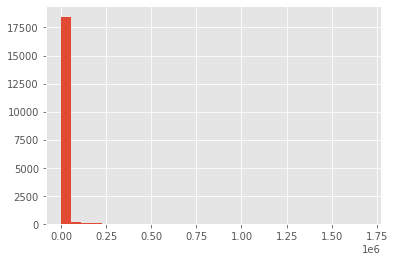

In [54]:
df.likeCount.hist(bins=30);

If it is not particularly visible, then you can look at the log scale:

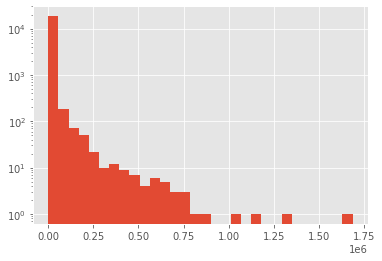

In [55]:
df.likeCount.hist(bins=30, log=True);

That is, we have clips in the sample with an abnormal number of likes - the so-called hits. They spoil all the statistics for us.  

Let's try to get rid of them:

**Method #1:** Let's discard $1\%$ of our sample of clips that have the most likes. Let's use the $99\%$ percentile for this.

In [56]:
df.likeCount.quantile(0.99)

128146.6499999979

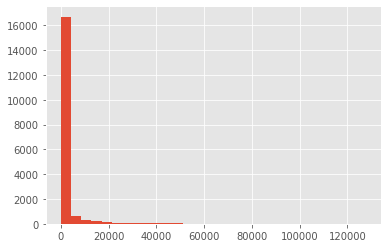

In [57]:
threshold = df.likeCount.quantile(0.99)
df_clear = df[df.likeCount <= threshold]

# visualize
df_clear.likeCount.hist(bins=30);

**Method #2:** We consider as anomalies all observations that were outside the three interquartile deviations.  

##### Task #8:

Implement this method. The interquartile deviation is the difference between the 25th and 75th percentiles.

In [58]:
# your code here

# q1 =
# q3 = 
# iqr = 
# min_ = 
# max_ = 

It is worth noting that sometimes looking for anomalies is required not only for data processing. Sometimes, the search for anomalies $-$ is the task. For example, bank fraudsters whose behavior differs from ordinary users are anomalies. And the search for such people is our task.